# Cargamos las librerías


In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline




# Leer la data


In [183]:
df=pd.read_csv('data.csv')


# Data

- G   : Género
- E   : Edad
- NEU : Neutrofilos
- LIN : Linfocitos
- RNL : Relación Neutrófilo Linfocito
- DX1 : Diagnóstico 1
- DX2 : Diagnóstico 2
- DX3 : Diagnóstico 3
- DX4 : Diangóstico 4
- ME  : Motivo de Egreso {M: 'Mejoría',D: 'Defunsión'}


In [184]:
df.head()

,Nombre,G,E,NEU,LIN,RNL,DX1,DX2,DX3,DX4,ME
0,AGUILAR TORRES JUANITA,M,64,13.81,2.12,6.51,CHS,ABDO,NaN,NaN,M
1,AGUINAGA REYES MARIA LUISA,M,78,8.79,1.58,5.56,IAM,NaN,NaN,NaN,M
2,ALARCON GOMEZ FRANCISCO,H,96,4.18,0.93,4.49,IAM,NaN,NaN,NaN,M
3,ALVA MUCIÑO ESTHER,M,56,8.87,2.75,3.23,EHHNC,NaN,NaN,NaN,M
4,ALVA SEGURA FERNANDO,H,75,5.97,1.12,5.33,IAM,NaN,NaN,NaN,M


# Análisis descriptivo

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe436c96198>,
      dtype=object)

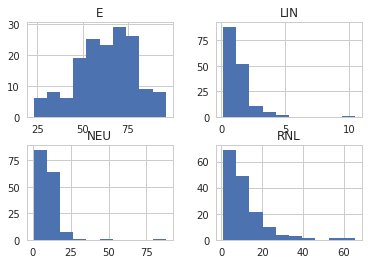

In [185]:
df.hist()

In [186]:
df.groupby('G').count()

,Nombre,E,NEU,LIN,RNL,DX1,DX2,DX3,DX4,ME
G,,,,,,,,,,
H,79,79,79,79,79,79,31,11,0,79
M,80,80,80,80,80,80,44,13,1,80


In [187]:
df.groupby('ME').count()

,Nombre,G,E,NEU,LIN,RNL,DX1,DX2,DX3,DX4
ME,,,,,,,,,,
D,35,35,35,35,35,35,35,29,10,1
M,124,124,124,124,124,124,124,46,14,0


In [188]:
df.groupby(['G','ME']).count()

Nombre   E  NEU  LIN  RNL  DX1  DX2  DX3  DX4
G ME                                               
H D       16  16   16   16   16   16   11    3    0
  M       63  63   63   63   63   63   20    8    0
M D       19  19   19   19   19   19   18    7    1
  M       61  61   61   61   61   61   26    6    0

In [189]:
df.groupby(['DX1']).count()[['G','ME']].sort_values('G',ascending=False).head()

,G,ME
DX1,,
IAM,31,31
CHS,24,24
POAR,20,20
CAD,13,13
EHHNC,12,12


In [190]:
df.groupby(['DX2']).count()[['G','ME']].sort_values('G',ascending=False).head()

,G,ME
DX2,,
LAPE,9,9
POAR,8,8
UROSEP,6,6
NEUMO,4,4
SD,3,3


In [191]:
df.groupby(['DX3']).count()[['G','ME']].sort_values('G',ascending=False).head()

,G,ME
DX3,,
LAPE,10,10
IVU,2,2
APEN,1,1
CCT,1,1
EHHNC,1,1


In [192]:
df.groupby(['DX4']).count()[['G','ME']].sort_values('G',ascending=False).head()

,G,ME
DX4,,
CCT,1,1


Convertimos tanto el género como el motivo de egreso a valores numéricos
- G  : {0: 'Mujer',1: 'Hombre'}
- ME : {0: 'Mejoría',1: 'Defunción'}

In [193]:
df.loc[df.G=='M','G']=0
df.loc[df.G=='H','G']=1
df.EDAD=df.E.astype(int)
df=df.fillna('')
df.loc[df.ME=='M','ME']=0
df.loc[df.ME=='D','ME']=1


/home/jesus/anaconda3/envs/tensorflow/lib/python3.4/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [194]:
df['LEU'] = df.NEU + df.LIN

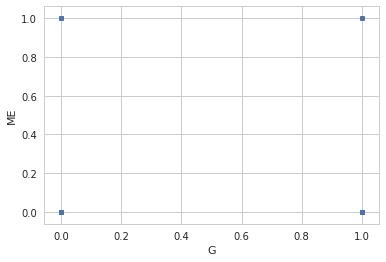

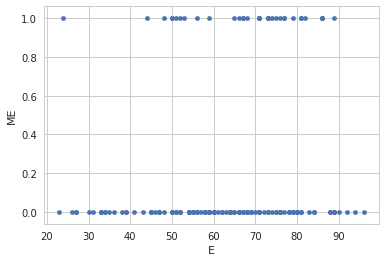

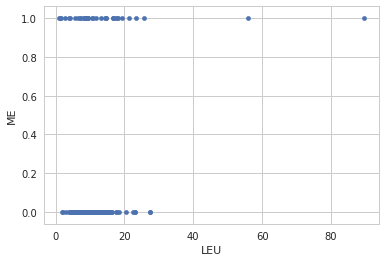

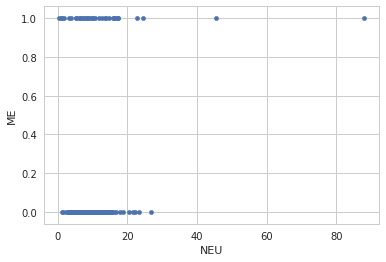

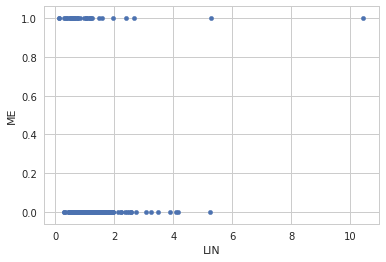

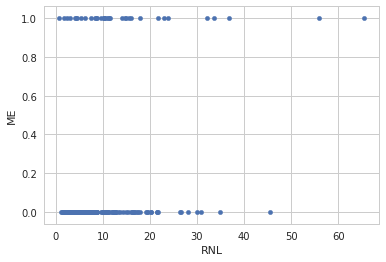

In [195]:
variables=['G','E','LEU','NEU','LIN','RNL']
for v in variables:
    df.plot.scatter(x=v,y='ME')

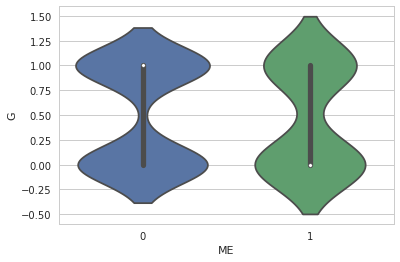

In [196]:
sns.violinplot(x='ME', y="G", data=df)

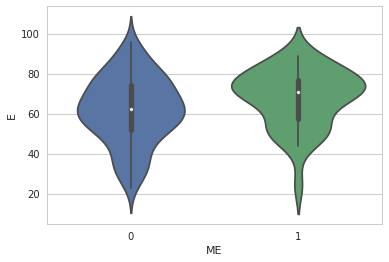

In [197]:
sns.violinplot(x='ME', y="E", data=df)

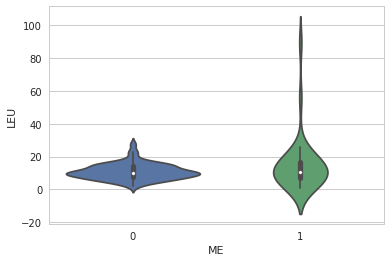

In [198]:
sns.violinplot(x='ME', y="LEU", data=df)

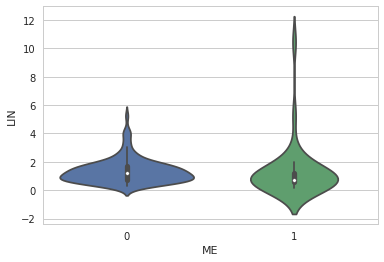

In [199]:
sns.violinplot(x='ME', y="LIN", data=df)

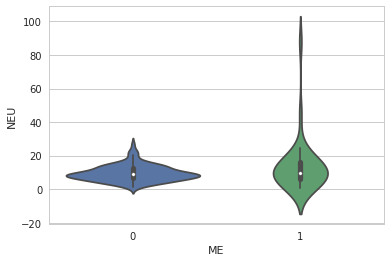

In [200]:
sns.violinplot(x='ME', y="NEU", data=df)

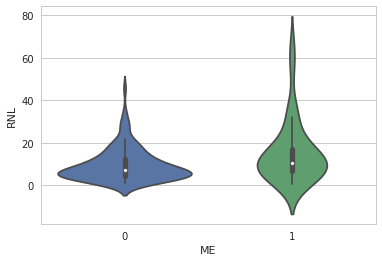

In [201]:
sns.violinplot(x='ME', y="RNL", data=df)

### Calculamos los promedios por caracteristica

In [202]:
df.groupby('ME').mean()

,G,E,NEU,LIN,RNL,LEU
ME,,,,,,
0,0.508065,61.701613,9.605403,1.360000,9.700242,10.965403
1,0.457143,67.828571,13.397143,1.291143,15.323143,14.688286


In [203]:
### Calculamos las desviaciones estandard


In [204]:
df.groupby('ME').std()

,G,E,NEU,LIN,RNL,LEU
ME,,,,,,
0,0.501963,16.579437,4.632684,0.848170,7.622680,4.734367
1,0.505433,14.425235,15.461990,1.848703,14.411154,16.309307


In [205]:
u = df.groupby('ME').mean().apply(lambda r: abs(r[1]-r[0]))
u

G      0.050922
E      6.126959
NEU    3.791740
LIN    0.068857
RNL    5.622901
LEU    3.722882
dtype: float64

In [206]:
v = ((df.groupby('ME').std()**2)/(df.groupby('ME')[['E','G','LEU','LIN','RNL','NEU']].count())).sum()
v

E      8.162110
G      0.009331
LEU    7.780574
LIN    0.103450
NEU    7.003740
RNL    6.402344
dtype: float64

In [207]:
u = u/np.sqrt(v)
u = u.reset_index().rename(columns = {0: 't_prueba'})
u['Hipotesis'] = u['t_prueba']>1.8946 
u

,index,t_prueba,Hipotesis
0,E,2.144587,True
1,G,0.527158,False
2,LEU,1.334669,False
3,LIN,0.214084,False
4,NEU,1.432760,False
5,RNL,2.222240,True


# Conclusión 1

- La edad y la Razón NL están relacionadas al motivo de egreso

# Modelos

In [212]:
clf = linear_model.LogisticRegression(C=1e5)


y=df.ME.values
X=df[['G','E','LEU','NEU','LIN','RNL']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
#matriz de confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)
#reporte
print(classification_report(y_test, y_pred))
# coeficientes
print(clf.coef_)

Accuracy of logistic regression classifier on test set: 0.81
[[39  2]
 [ 7  0]]
             precision    recall  f1-score   support

          0       0.85      0.95      0.90        41
          1       0.00      0.00      0.00         7

avg / total       0.72      0.81      0.77        48

[[-0.45608681  0.02392079  0.04849477 -0.03122409  0.07971886  0.05777846]]


ValueError: Found input variables with inconsistent numbers of samples: [159, 1]

## ROC

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## xgboost